In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%autoreload
from Inicializacion import *
from Prediction import *

Inicializando dataframes
Comenzando operaciones
240000
	 Nulls
		 Drop cols
		 Fill metros
			 Terreno
			 Apartamento
			 Metros cubiertos null
			 Metros totales null
			 Terreno comercial
240000
	 Encoding
240000
	 drop nans in selected columns
		 Drop nan
	 Cast
239616
	 Features engineering
		 Separar fecha
239616
		 Predict nulls
			 fill with xgboost. Feature:  {'garages'}
			 Time taken: 0 hours 3 minutes and 4.11 seconds.
				 Los mejores parametros son: 
				 {'learning_rate': 0.01, 'gamma': 0.5, 'min_child_weight': 5, 'subsample': 0.8, 'n_estimators': 50, 'max_depth': 4, 'colsample_bytree': 0.8}
				 ------------------------
				 Best score: 
				 0.6687381902162503
				 ------------------------
			 fill with xgboost. Feature:  {'banos'}
			 Time taken: 0 hours 4 minutes and 7.0 seconds.
				 Los mejores parametros son: 
				 {'learning_rate': 0.01, 'gamma': 0.5, 'min_child_weight': 5, 'subsample': 0.8, 'n_estimators': 50, 'max_depth': 4, 'colsample_bytree': 0.8}
				 ------

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.5/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.5/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[13:10:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
			 Time taken: 0 hours 1 minutes and 0.47 seconds.
				 Los mejores parametros son: 
				 {'learning_rate': 0.01, 'gamma': 0.5, 'min_child_weight': 5, 'subsample': 0.8, 'n_estimators': 50, 'max_depth': 4, 'colsample_bytree': 0.8}
				 ------------------------
				 Best score: 
				 -100.19484912441465
				 ------------------------
239616
	 drop other nans
	 Recast final
219442
Comenzando operaciones
60000
	 Nulls
		 Drop cols
		 Fill metros
			 Terreno
			 Apartamento
			 Metros cubiertos null
			 Metros totales null
			 Terreno comercial
60000
	 Encoding
60000
	 Cast
60000
	 Features engineering
		 Separar fecha
60000
		 Predict nulls
			 fill with xgboost. Feature:  {'garages'}
			 Time taken: 0 hours 0 minutes and 1.61 seconds.
			 fill with xgboost. Feature:  {'banos'}
			 Time taken: 0 hours 0 minutes and 1.82 seconds.
			 fill with xgboost. Feature:  {'h

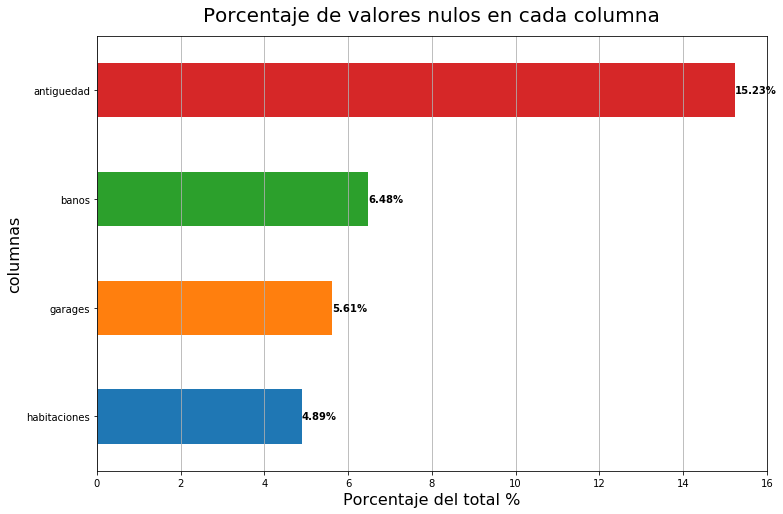

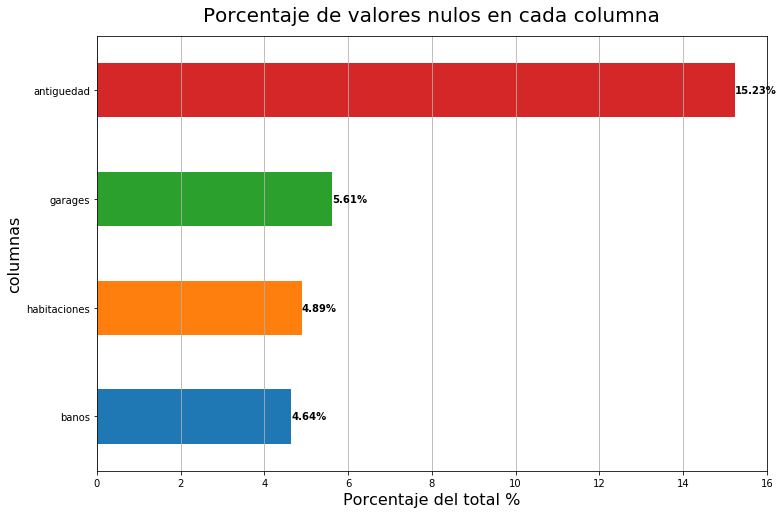

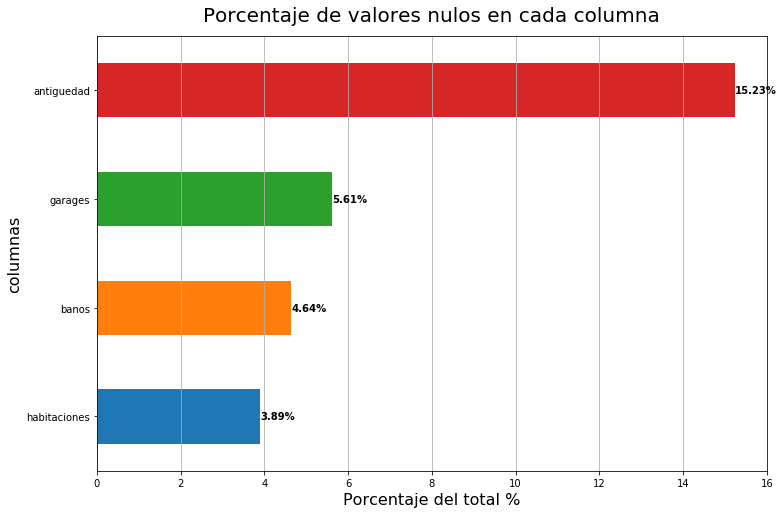

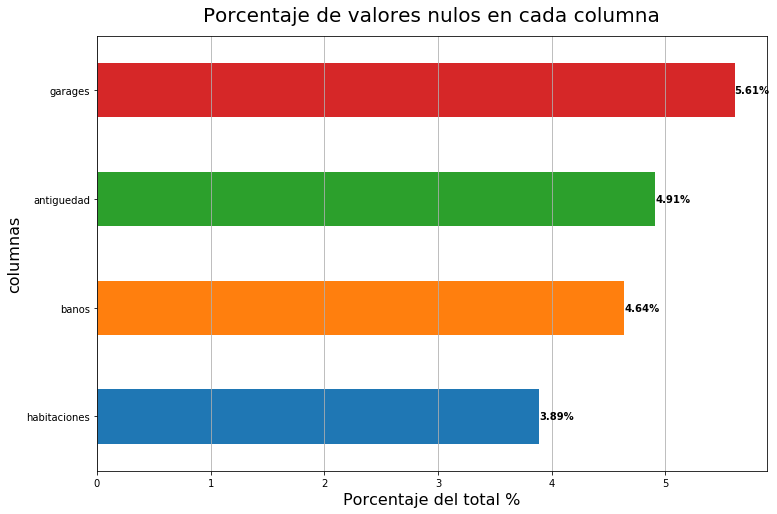

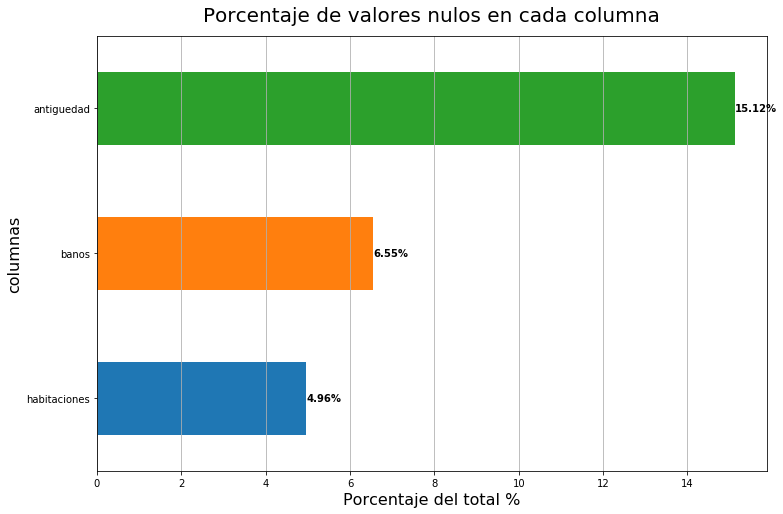

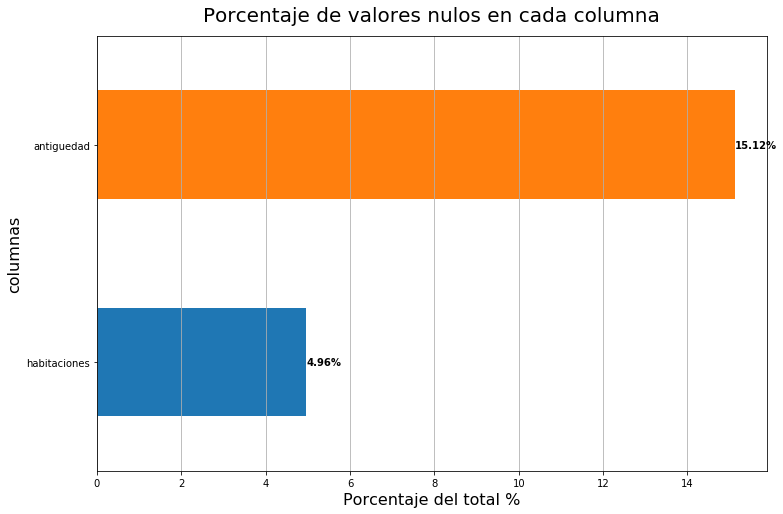

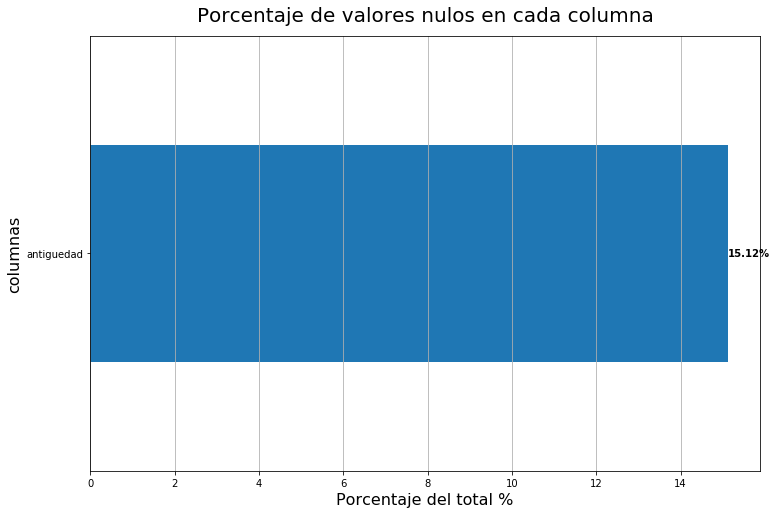

In [8]:
preprocesamiento = Inicializacion()
data = preprocesamiento.getDataframes()
distances = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
param_grid = {'n_neighbors': np.arange(15, 34, 2), 'metric': distances}

In [9]:
print(len(data[0]))
print(len(data[1]))

219442
60000


In [10]:
model = Prediction(data, KNeighborsRegressor(), param_grid, 'knntest')
model.train()
model.save()

Training...
{'metric': 'manhattan', 'n_neighbors': 29}
-1106801.4233057895


In [11]:
model.submit()

In [ ]:
from xgboost import XGBRegressor

paramsGenerales = {
        'verbose': True,  # mostrar imagenes post transformacion
        'guardarImagenes': False,  # Guarda imagenes post transformacion
        'encoder': 0,  # Encoder. 0 Binario, 1 One hot encoding
        'usarModelo': False,  # Si esta el modelo de pickle lo usa
        'esTest': False,  # Si es test no droppeamos nans
        # Para xgboost
        'min_child_weight': [5],
        'gamma': [0.5],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'max_depth': [4],
        'n_estimators': [50],
        'learning_rate': [0.01],
        'scoring_regressor': 'neg_mean_squared_error',
        'scoring_cat': 'accuracy',
        'folds': 2,
        'param_comb': 1,
    }
    
params = {'min_child_weight': paramsGenerales['min_child_weight'],
          'gamma': paramsGenerales['gamma'],
          'subsample': paramsGenerales['subsample'],
          'colsample_bytree': paramsGenerales['colsample_bytree'],
          'max_depth': paramsGenerales['max_depth'],
          'n_estimators': paramsGenerales['n_estimators'],
          'learning_rate': paramsGenerales['learning_rate']
          }

model = Prediction(data, KNeighborsRegressor(), param_grid, 'knntest')
model.train()
model.save()


Training...
